# Emotion Detection ( Text Data Analysis Case Study)

# What is emotion detection in NLP?
Natural Language Processing (NLP) has enabled us to detect such emotions from written text such as reviews, publications, recommendations, conversations, etc., and take immediate action accordingly. Emotion Detection refers to the accurate identification of emotion from contextual data.

# Inspiration
The data that we have is having 13 different emotion 40000 records. So it's challenging to build an efficient multiclass classification model. We may need to logically reduce the number of classes here and use some advanced methods to build efficient model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [2]:
df = pd.read_csv('tweet_emotions.csv')
df.head(20)

tweet_id   sentiment                                            content
0   1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1   1956967666     sadness  👎Layin n bed with a headache  ughhhh...waitin ...
2   1956967696     sadness                Funeral ceremony...gloomy friday...
3   1956967789  enthusiasm               wants to hang out with friends SOON!
4   1956968416     neutral  @dannycastillo We want to trade with someone w...
5   1956968477       worry  Re-pinging @ghostridah14: why didn't you go to...
6   1956968487     sadness  I should be sleep, but im not! thinking about ...
7   1956968636       worry               Hmmm. http://www.djhero.com/ is down
8   1956969035     sadness            @charviray Charlene my love. I miss you
9   1956969172     sadness         @kelcouch I'm sorry  at least it's Friday?
10  1956969456     neutral                                   cant fall asleep
11  1956969531       worry                            Choked on her retainers
12  1956970047     sadness  Ugh! I have to beat this stupid song to get to...
13  1956970424     sadness  @BrodyJenner if u watch the hills in london u ...
14  1956970860    surprise                                       Got the news
15  1956971077     sadness      The storm is here and the electricity is gone
16  1956971170        love                             @annarosekerr agreed 👍
17  1956971206     sadness  So sleepy again and it's not even that late. I...
18  1956971473       worry  @PerezHilton lady gaga tweeted about not being...
19  1956971586     sadness  How are YOU convinced that I have always wante...

In [3]:
df.shape

(40000, 3)

In [4]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [5]:
df['sentiment'].nunique()

13

In [5]:
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

# Sentiment Analysis Part

# Two points must take care of it:
- **Polarity** is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

- **Subjectivity** quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.. Subjectivity is also a float which lies in the range of [0,1].


In [3]:
%pip install textblob

In [4]:
from textblob import TextBlob

In [8]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [ ]:
polarity=[]
subjectivity=[]
for content in df['content']:
    polarity.append(TextBlob(content).sentiment.polarity)
    subjectivity.append(TextBlob(content).sentiment.subjectivity)
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head()

**TRY BETTER CODE**

In [5]:
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  👎Layin n bed with a headache  ughhhh...waitin ...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

   polarity  subjectivity  
0     -0.35      0.583333  
1      0.00      0.000000  
2      0.00      0.000000  
3      0.25      0.100000  
4      0.00      0.000000

# Emojy Analysis
Replace any emojis with the text they represent as emojis or emoticons plays an important role in representing a sentiment

Note-->> Every emoji has a Unicode associated with it
 '\U0001F600' is a unicode for 😀

 Unicode-->>The Unicode Standard provides a unique number for every characte ,ie 
           Unicode is a universal character encoding standard that assigns a code to every character and symbol in every language

In [6]:
%pip install emoji

In [7]:
import emoji

In [14]:
emoji.distinct_emoji_list('👎 Layin n bed with a headache  ughhhh...waitin on your call...')

['👎']

In [8]:
# Extract emoji
df['emoji'] = df['content'].apply(lambda x: emoji.distinct_emoji_list(x))
df.head()

tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  👎Layin n bed with a headache  ughhhh...waitin ...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

   polarity  subjectivity emoji  
0     -0.35      0.583333    []  
1      0.00      0.000000   [👎]  
2      0.00      0.000000    []  
3      0.25      0.100000    []  
4      0.00      0.000000    []

**OR**

In [9]:
# Extract emoji
emoji_overall_list=[]
for content in df['content']:
    emoji_list=[]
    char=emoji.distinct_emoji_list(content)
    for emojichar in char:
        emoji_list.append(emojichar)
    emoji_overall_list.append(emoji_list)    
df['emoji'] = emoji_overall_list
df.head()

tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  👎Layin n bed with a headache  ughhhh...waitin ...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

   polarity  subjectivity emoji  
0     -0.35      0.583333    []  
1      0.00      0.000000   [👎]  
2      0.00      0.000000    []  
3      0.25      0.100000    []  
4      0.00      0.000000    []

In [18]:
# Replace emoji by its meaning in text
for i in range(0,len(df['content'])):
    content = df['content'][i]
    df['content'][i] = emoji.demojize(content, delimiters=(" ", " ")) 
df.head()    

C:\Users\M4TECH\AppData\Local\Temp\ipykernel_13908\2130305464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][i] = emoji.demojize(content, delimiters=(" ", " "))


tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness   thumbs_down Layin n bed with a headache  ughh...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

   polarity  subjectivity emoji  
0     -0.35      0.583333    []  
1      0.00      0.000000   [👎]  
2      0.00      0.000000    []  
3      0.25      0.100000    []  
4      0.00      0.000000    []

# Preparing Text Part

In [20]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

%pip install autocorrect
from autocorrect import Speller

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M4TECH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     -------------------------------------- 622.8/622.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=2f8f304a3b55cf5bd630380bc941622bfa19091361acc5719ca6bdfaefde97bb
  Stored in directory: c:\users\m4tech\appdata\local\pip\cache\wheels\ab\0f\23\3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


# Fixing Word Lengthening
Word lengthening occurs when characters are wrongly repeated. English words have a max of two repeated characters. Additional characters need to ripped off, otherwise we might add misleading information.

In [21]:
#lengthening finallllllly to finally (only two repeat character so the word is correnct)
def reduce_lengthening(text):
    """ 
    The pattern `r"(.)\1{2,}"` is designed to match any character that is repeated three or more times.
    Here, `(.)` matches any character and `\1{2,}` checks for the same character repeated two or more times.
    
    The `sub` method of the compiled pattern is then used to replace all matches in the text.
    The replacement string is `r"\1\1"`, which means that any character that is matched
    by the pattern (i.e., any character that is repeated three or more times)
    will be replaced by two instances of the same character.

    """
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

word = reduce_lengthening('finallllllly')
print(word)

word = reduce_lengthening('amazzzzing')
print(word)

finally
amazzing


# Spelling Correction
but what happen if it was some word that has actually no repeated characters at all. 
It would fail in that case for example, “amazzzzing” will return “amazzing”, which is wrong. So we need spell correction after word lengthening to get the correct word.

In [22]:
check = Speller(lang='en')
word=check.autocorrect_word('amazzing')
print(word)

amazing


# Implement Stemming 
the process of reducing a word to its roots .( going ---> go, (did,doing)--->do)

In [23]:
ps = PorterStemmer()
word=ps.stem('going')
print(word)

go


# Tokenization 
is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words)

In [24]:
#Split the text into tokens 
corpus = []
for i in range(0,df.shape[0]):
    content = df['content'][i]
    # remove all carachter not a-z or A-Z or # or @ 
    # NOTE: we let @ / # becasue thery are meaningful wheather for mentioning tweets or hashtags. 
    content= re.sub('[^a-zA-Z#@]', ' ',content )
    content = reduce_lengthening(content)
    content= content.lower()
    content= content.split()
    content = [ps.stem(word) for word in content if not word in set(stopwords.words('english'))]
    #content = [check.autocorrect_word(word) for word in content ]
    content = ' '.join(content) 
    corpus.append(content)

In [25]:
corpusdf=pd.DataFrame(corpus)
corpusdf.to_csv('corpus.csv', index = False)

# Creating the Bag of Words model

**The term "bag-of-words" generally refers to a representation of text where the order of words is disregarded, and the focus is on the frequency of words in a document.**

The Bag of Words (BoW) model is a common and simple way of representing text data in natural language processing (NLP) and information retrieval. In the Bag of Words model, a document is represented as an unordered set of words, disregarding grammar and word order but keeping track of the frequency of each word. The name "Bag of Words" implies that the model is concerned only with the occurrence and frequency of words, not with their sequence or position in the document.

Here's how the Bag of Words model works:

Tokenization: The first step is to break down a document into individual words, a process known as tokenization. Punctuation and capitalization are usually ignored during this step.

Vocabulary Building: A vocabulary is created by compiling a list of all unique words (or tokens) from the entire set of documents in the corpus. Each word in this vocabulary will become a feature.

Vectorization: Each document is then represented as a numerical vector, where each element of the vector corresponds to a word in the vocabulary. The value of each element is the frequency of the corresponding word in the document.

In [26]:
corpusdf= pd.read_csv('corpus.csv')
corpusdf.head()

0
0  @tiffanylu know listenin bad habit earlier sta...
1         thumb layin n bed headach ughh waitin call
2                       funer ceremoni gloomi friday
3                              want hang friend soon
4  @dannycastillo want trade someon houston ticke...

In [30]:
corpusdf.isnull().sum()

0    21
dtype: int64

In [31]:
corpusdf.fillna(' ',inplace=True)
corpus=corpusdf.iloc[:,0].values
corpus

array(['@tiffanylu know listenin bad habit earlier start freakin part',
       'thumb layin n bed headach ughh waitin call',
       'funer ceremoni gloomi friday', ...,
       'happi mother day mommi woman man long momma someon day',
       '@niariley wassup beauti follow peep new hit singl ww myspac com ipsohot def wat u video',
       '@mopedronin bullet train tokyo gf visit japan sinc thursday vacat sightse gaijin godzilla'],
      dtype=object)

In [35]:
corpus.shape

(40000,)


`CountVectorizer` and `TfidfVectorizer` are both tools used in natural language processing (NLP) and text analysis to convert text data into a numerical format that can be used for machine learning models. Here are the key differences between the two:

### 1. **CountVectorizer:**
   - **Representation:** It represents the text data by counting the occurrences of each word (or token) in the document.
   - **Output:** The output is a sparse matrix where each row corresponds to a document, and each column corresponds to a unique word in the corpus. The values in the matrix represent the count of each word in the corresponding document.
   - **Normalization:** It does not perform any normalization based on the length of the documents.
   - **Usage:** It is suitable for tasks where the frequency of words is important, but it may not be effective in distinguishing the importance of words across different documents.

### 2. **TfidfVectorizer:**
   - **Representation:** It represents the text data using the TF-IDF (Term Frequency-Inverse Document Frequency) metric, which considers both the frequency of a term in a document and its rarity across all documents in the corpus.
   - **Output:** Similar to `CountVectorizer`, it produces a sparse matrix, but the values in the matrix are TF-IDF scores.
   - **Normalization:** It normalizes the counts based on the length of the documents, giving more weight to terms that are rare across the entire corpus.
   - **Usage:** It is suitable for tasks where not only the frequency but also the importance of words in distinguishing documents is essential. It helps in giving higher weight to terms that are important in a specific document but not common across all documents.

### Key Considerations:
   - **Sparse vs. Dense Representation:** Both vectorizers produce sparse matrices, but `TfidfVectorizer` tends to produce matrices with more zeros due to the normalization factor.
   - **Importance of Words:** `TfidfVectorizer` is generally more effective when you want to capture the importance of words in a document, which can be crucial in tasks like document classification and information retrieval.
   - **Task-specific:** The choice between the two often depends on the specific requirements of the task at hand. For instance, `CountVectorizer` might be sufficient for tasks where the emphasis is on word frequency.

In summary, while both vectorizers convert text data into numerical format, `CountVectorizer` emphasizes word frequency, whereas `TfidfVectorizer` considers both frequency and the rarity of words across documents, making it more effective in capturing the importance of terms in a document collection. The choice between them depends on the specific goals of your NLP task.



In [36]:
# Creating the Bag of Words model

# module that converts a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)

""" 
from sklearn.feature_extraction.text import TfidfVectorizer
cv= TfidfVectorizer(max_features=500,ngram_range=(1,2))

the TfidfVectorizer class which is used to convert a collection of raw documents to a matrix of TF-IDF features.
it's not only takes into account the frequency of a word in a single document,
but also the frequency of a word acorss all documents in the entire corpora.
this gives more weight to words that are more meaningful and less weight to common word that appear in many documents.

ngram_range = specifiy the range of n-value for different n-grams to be extracted.
ngram_range = (1,2) means that we want to consider both unigrams (single words) and bigrams (two words) as tokens.

"""

xarr= cv.fit_transform(corpus).toarray()
xdf=pd.DataFrame(xarr)
xdf.columns = cv.vocabulary_.keys()  # get the feature names
X=pd.concat([df[['sentiment']], xdf], axis = 1)
y = df.iloc[:, 1].values  # sentiment column

X.head()


sentiment  know  listenin  bad  habit  earlier  start  freakin  part  \
0       empty     0         0    0      0        0      0        0     0   
1     sadness     0         0    0      0        0      0        0     0   
2     sadness     0         0    0      0        0      0        0     0   
3  enthusiasm     0         0    0      0        0      0        0     0   
4     neutral     0         0    0      0        0      0        0     0   

   thumb  bed  headach  ughh  waitin  call  funer  ceremoni  gloomi  friday  \
0      0    0        0     0       0     0      0         0       0       0   
1      0    0        0     0       0     0      0         0       0       0   
2      0    0        0     0       0     0      0         0       0       0   
3      0    0        0     0       0     0      0         0       0       0   
4      0    0        0     0       0     0      0         0       0       0   

   want  hang  friend  soon  trade  someon  houston  ticket  one  ping  go  \
0     0     0       0     0      0       0        0       0    0     0   0   
1     0     0       0     0      0       0        0       0    0     0   0   
2     0     0       0     0      0       0        0       0    0     0   0   
3     0     0       0     0      0       0        0       0    0     0   0   
4     0     0       0     0      0       0        0       0    0     0   0   

   prom  bc  bf  like  sleep  im  think  old  marri  damn  amp  hmm  http  ww  \
0     0   0   0     0      0   0      0    0      0     0    0    0     0   0   
1     0   0   0     0      0   0      0    0      0     0    0    0     0   0   
2     0   0   0     0      0   0      0    0      0     0    0    0     0   0   
3     0   0   0     0      0   0      0    0      0     0    0    0     0   0   
4     0   0   0     0      0   0      0    0      0     0    0    0     0   0   

   com  love  miss  sorri  least  cant  fall  asleep  choke  retain  ugh  \
0    0     0     0      0      0     0     0       0      0       0    0   
1    0     0     0      0      0     0     0       0      0       0    0   
2    0     0     0      0      0     0     0       0      0       0    0   
3    0     0     0      0      0     0     0       0      0       0    0   
4    0     0     0      0      0     0     0       0      0       0    0   

   beat  stupid  song  get  next  rude  watch  hill  london  realis  week  \
0     0       0     0    0     0     0      0     0       0       0     0   
1     0       0     0    0     0     0      0     0       0       0     0   
2     0       0     0    0     0     0      0     0       0       0     0   
3     0       0     0    0     0     0      0     0       0       0     0   
4     0       0     0    0     0     0      0     0       0       0     0   

   late  got  news  storm  electr  gone  agre  sleepi  even  fail  \
0     0    0     0      0       0     0     0       0     0     0   
1     0    0     0      0       0     0     0       0     0     0   
2     0    0     0      0       0     0     0       0     0     0   
3     0    0     0      0       0     0     0       0     0     0   
4     0    0     0      0       0     0     0       0     0     0   

   perezhilton  ladi  gaga  tweet  impress  video  leak  convinc  alway  \
0            0     0     0      0        0      0     0        0      0   
1            0     0     0      0        0      0     0        0      0   
2            0     0     0      0        0      0     0        0      0   
3            0     0     0      0        0      0     0        0      0   
4            0     0     0      0        0      0     0        0      0   

   signal  give  lost  anoth  oh  hope  better  issu  wonder  awak  write  \
0       0     0     0      0   0     0       0     0       0     0      0   
1       0     0     0      0   0     0       0     0       0     0      0   
2       0     0     0      0   0     0       0     0       0     0      0   
3       0     0     0 

In [38]:
df_group=X.groupby('sentiment').sum()
df_group.head()

know  listenin  bad  habit  earlier  start  freakin  part  thumb  \
sentiment                                                                      
anger          1         0    0      0        1      0        0     0      0   
boredom        0         0    0      0        0      0        0     0      0   
empty          0         1    0      2        1      1        0     0      0   
enthusiasm     0         0    0      0        0      0        0     0      0   
fun            1         1    3      1        0      2        0     0      0   

            bed  headach  ughh  waitin  call  funer  ceremoni  gloomi  friday  \
sentiment                                                                       
anger         0        0     0       0     0      0         0       0       0   
boredom       0        0     1       0     0      0         0       0       0   
empty         0        0     4       0     0      0         0       0       0   
enthusiasm    0        0     3       1     0      0         1       0       0   
fun           0        0     5       5     0      0         1       0       0   

            want  hang  friend  soon  trade  someon  houston  ticket  one  \
sentiment                                                                   
anger          0     0       0     1      0       0        2       0    2   
boredom        0     0       0     0      0       0        0       0    0   
empty          0     0       0     1      1       0        0       1    1   
enthusiasm     0     0       1     1      0       0        0       0    3   
fun            0     1       0     1      0       1        0       0    1   

            ping  go  prom  bc  bf  like  sleep  im  think  old  marri  damn  \
sentiment                                                                      
anger          0   0     0   0   0     1      0   0      0    0      0     0   
boredom        0   0     1   0   0     0      0   0      0    1      0     0   
empty          0   1     1   0   0     0      1   0      0    1      1     1   
enthusiasm     0   1     1   0   1     0      0   0      0    0      2     2   
fun            0   3     2   0   0     2      0   1      1    0      5     1   

            amp  hmm  http  ww  com  love  miss  sorri  least  cant  fall  \
sentiment                                                                   
anger         0    0     0   0    0     0     0      0      0     0     0   
boredom       0    0     0   3    0     0     0      0      0     0     0   
empty         1    0     0   0    2     0     2      0      2     0     0   
enthusiasm    0    0     0   4    0     1     1      0      4     0     0   
fun           1    2     0  21    5     0     1      1      4     0     7   

            asleep  choke  retain  ugh  beat  stupid  song  get  next  rude  \
sentiment                                                                     
anger            0      0       0    0     0       0     0    0     0     0   
boredom          0      1       0    0     0       0     0    0     0     0   
empty            0      0       1    0     0       0     0    0     0     0   
enthusiasm       0      0       0    0     0       0     1    0     1     0   
fun              0      1       0    1     2       1     2    2     1     0   

            watch  hill  london  realis  week  late  got  news  storm  electr  \
sentiment                                                                       
anger           0     0       0       0     0     0    0     0      0       0   
boredom         0     0       0       0     0     0    1     0      0       0   
empty           0     1       0       0     0     0    0     2      0       2   
enthusiasm      0     1       1       0     0     0    1     0      0       1   
fun             0     0       0       0     0     0    1     1      0       5   

            gone  agre  sleepi  even  fail  perezhilton  ladi  gaga  tweet  \
sentiment                                 

In [67]:
df_group.idxmax(axis="columns")

sentiment
anger                  fyi
boredom                pat
empty                  fyi
enthusiasm             fyi
fun                   asap
happiness              war
hate          unfortunatli
love                hacker
neutral                fyi
relief                 war
sadness             regist
surprise              abit
worry                  fyi
dtype: object

In [43]:
# see the sentiment of the most important word how many times it appears.
df_group.loc['anger', 'fyi']

11

In [47]:
features_list =df_group.iloc[0,:].sort_values(ascending=False).head(100)
features_list

fyi               11
necessari         10
heavenli           8
logic              8
abit               8
sp                 7
war                7
soup               5
cartoon            5
effort             5
size               5
neat               5
tommi              5
donniewahlberg     5
oop                5
content            4
asap               4
tempt              4
individu           4
belong             4
alic               4
nan                4
creepi             4
grumpi             4
jerri              3
fi                 3
pub                3
sm                 3
perfect            3
deliveri           3
bake               3
sick               3
th                 3
sat                3
employe            3
weak               3
mexican            3
tomato             3
mileycyru          3
poker              3
pirat              3
ok                 3
young              3
hollyoak           2
crisi              2
bout               2
pleas              2
forgiv       

In [ ]:
df_group.shape

(13, 5000)

In [49]:
dictall={}

for i in range(df_group.shape[0]):
    features_list =df_group.iloc[i,:].sort_values(ascending=False).head(3000)
    dict1=features_list.to_dict()
    dictall.update(dict1)
    
important_word_all=[key for key,value in dictall.items() ]
print(important_word_all)  

['fyi', 'necessari', 'heavenli', 'logic', 'abit', 'sp', 'war', 'soup', 'cartoon', 'effort', 'size', 'neat', 'tommi', 'donniewahlberg', 'oop', 'content', 'asap', 'tempt', 'individu', 'belong', 'alic', 'nan', 'creepi', 'grumpi', 'jerri', 'fi', 'pub', 'sm', 'perfect', 'deliveri', 'bake', 'sick', 'th', 'sat', 'employe', 'weak', 'mexican', 'tomato', 'mileycyru', 'poker', 'pirat', 'ok', 'young', 'hollyoak', 'crisi', 'bout', 'pleas', 'forgiv', 'youtub', 'pwn', 'evid', 'restor', 'lee', 'hangov', 'journal', 'decent', 'thank', 'lash', 'opinion', 'billi', 'wh', 'maggi', 'kingdom', 'demon', 'macbook', 'farm', 'given', 'teas', 'worker', 'whine', 'joeymcintyr', 'mention', 'counti', 'ring', 'commun', 'maddi', 'recommend', 'lool', 'ran', 'ap', 'wife', 'comput', 'wheel', 'poni', 'rosi', 'greenvil', 'clark', 'fusion', 'still', 'afternoon', 'spanish', 'babysit', 'hatz', 'perri', 'seven', 'hacker', 'sissi', 'al', 'houston', 'accomplish', 'tn', 'mayer', 'one', 'ceil', 'guild', 'hoe', 'fair', 'migran', 'new

**OR USE THAT CODE**

In [48]:
dictall = {}
important_word_all = [key for i in range(df_group.shape[0]) for key, value in df_group.iloc[i, :].sort_values(ascending=False).head(3000).to_dict().items()]
dictall = {word: i for i, word in enumerate(important_word_all)}
print(important_word_all)


['fyi', 'necessari', 'heavenli', 'logic', 'abit', 'sp', 'war', 'soup', 'cartoon', 'effort', 'size', 'neat', 'tommi', 'donniewahlberg', 'oop', 'content', 'asap', 'tempt', 'individu', 'belong', 'alic', 'nan', 'creepi', 'grumpi', 'jerri', 'fi', 'pub', 'sm', 'perfect', 'deliveri', 'bake', 'sick', 'th', 'sat', 'employe', 'weak', 'mexican', 'tomato', 'mileycyru', 'poker', 'pirat', 'ok', 'young', 'hollyoak', 'crisi', 'bout', 'pleas', 'forgiv', 'youtub', 'pwn', 'evid', 'restor', 'lee', 'hangov', 'journal', 'decent', 'thank', 'lash', 'opinion', 'billi', 'wh', 'maggi', 'kingdom', 'demon', 'macbook', 'farm', 'given', 'teas', 'worker', 'whine', 'joeymcintyr', 'mention', 'counti', 'ring', 'commun', 'maddi', 'recommend', 'lool', 'ran', 'ap', 'wife', 'comput', 'wheel', 'poni', 'rosi', 'greenvil', 'clark', 'fusion', 'still', 'afternoon', 'spanish', 'babysit', 'hatz', 'perri', 'seven', 'hacker', 'sissi', 'al', 'houston', 'accomplish', 'tn', 'mayer', 'one', 'ceil', 'guild', 'hoe', 'fair', 'migran', 'new

In [57]:
i=0
for key in dictall.keys():
    dictall[key]=i
    i=i + 1
dictall    

{'fyi': 0,
 'necessari': 1,
 'heavenli': 2,
 'logic': 3,
 'abit': 4,
 'sp': 5,
 'war': 6,
 'soup': 7,
 'cartoon': 8,
 'effort': 9,
 'size': 10,
 'neat': 11,
 'tommi': 12,
 'donniewahlberg': 13,
 'oop': 14,
 'content': 15,
 'asap': 16,
 'tempt': 17,
 'individu': 18,
 'belong': 19,
 'alic': 20,
 'nan': 21,
 'creepi': 22,
 'grumpi': 23,
 'jerri': 24,
 'fi': 25,
 'pub': 26,
 'sm': 27,
 'perfect': 28,
 'deliveri': 29,
 'bake': 30,
 'sick': 31,
 'th': 32,
 'sat': 33,
 'employe': 34,
 'weak': 35,
 'mexican': 36,
 'tomato': 37,
 'mileycyru': 38,
 'poker': 39,
 'pirat': 40,
 'ok': 41,
 'young': 42,
 'hollyoak': 43,
 'crisi': 44,
 'bout': 45,
 'pleas': 46,
 'forgiv': 47,
 'youtub': 48,
 'pwn': 49,
 'evid': 50,
 'restor': 51,
 'lee': 52,
 'hangov': 53,
 'journal': 54,
 'decent': 55,
 'thank': 56,
 'lash': 57,
 'opinion': 58,
 'billi': 59,
 'wh': 60,
 'maggi': 61,
 'kingdom': 62,
 'demon': 63,
 'macbook': 64,
 'farm': 65,
 'given': 66,
 'teas': 67,
 'worker': 68,
 'whine': 69,
 'joeymcintyr': 70,


In [58]:
dictnew = {value:key for key,value in dictall.items() }
dictnew   

{0: 'fyi',
 1: 'necessari',
 2: 'heavenli',
 3: 'logic',
 4: 'abit',
 5: 'sp',
 6: 'war',
 7: 'soup',
 8: 'cartoon',
 9: 'effort',
 10: 'size',
 11: 'neat',
 12: 'tommi',
 13: 'donniewahlberg',
 14: 'oop',
 15: 'content',
 16: 'asap',
 17: 'tempt',
 18: 'individu',
 19: 'belong',
 20: 'alic',
 21: 'nan',
 22: 'creepi',
 23: 'grumpi',
 24: 'jerri',
 25: 'fi',
 26: 'pub',
 27: 'sm',
 28: 'perfect',
 29: 'deliveri',
 30: 'bake',
 31: 'sick',
 32: 'th',
 33: 'sat',
 34: 'employe',
 35: 'weak',
 36: 'mexican',
 37: 'tomato',
 38: 'mileycyru',
 39: 'poker',
 40: 'pirat',
 41: 'ok',
 42: 'young',
 43: 'hollyoak',
 44: 'crisi',
 45: 'bout',
 46: 'pleas',
 47: 'forgiv',
 48: 'youtub',
 49: 'pwn',
 50: 'evid',
 51: 'restor',
 52: 'lee',
 53: 'hangov',
 54: 'journal',
 55: 'decent',
 56: 'thank',
 57: 'lash',
 58: 'opinion',
 59: 'billi',
 60: 'wh',
 61: 'maggi',
 62: 'kingdom',
 63: 'demon',
 64: 'macbook',
 65: 'farm',
 66: 'given',
 67: 'teas',
 68: 'worker',
 69: 'whine',
 70: 'joeymcintyr',


In [59]:
# Creating the Bag of Words model using important_word_all that we created above
cv = CountVectorizer(vocabulary=important_word_all)

#from sklearn.feature_extraction.text import TfidfVectorizer
#cv= TfidfVectorizer(max_features=500,ngram_range=(1,2))

xarr= cv.fit_transform(corpus).toarray()
X=pd.DataFrame(xarr)
X.columns = cv.vocabulary_.keys()
Xdf=pd.concat([df[['sentiment']], X], axis = 1)
y = df.iloc[:, 1].values

Xdf.head(20)

sentiment  fyi  necessari  heavenli  logic  abit  sp  war  soup  cartoon  \
0        empty    0          0         0      0     0   0    0     0        0   
1      sadness    0          0         0      0     0   0    0     0        0   
2      sadness    0          0         0      0     0   0    0     0        0   
3   enthusiasm    0          0         0      0     0   0    0     0        0   
4      neutral    0          0         0      0     0   0    0     0        0   
5        worry    0          0         0      0     0   0    0     0        0   
6      sadness    0          0         0      0     0   0    0     0        0   
7        worry    0          0         0      0     0   0    0     0        0   
8      sadness    0          0         0      0     0   0    0     0        0   
9      sadness    0          0         0      0     0   0    0     0        0   
10     neutral    0          0         0      0     0   0    0     0        0   
11       worry    0          0         0      0     0   0    0     0        0   
12     sadness    0          0         0      0     0   0    0     0        0   
13     sadness    0          0         0      0     0   0    0     0        0   
14    surprise    0          0         0      0     0   0    0     0        0   
15     sadness    0          0         0      0     0   0    0     0        0   
16        love    0          0         0      0     0   0    0     0        0   
17     sadness    0          0         0      0     0   0    0     0        0   
18       worry    0          0         0      0     0   0    0     0        0   
19     sadness    0          0         0      0     0   0    0     0        0   

    effort  size  neat  tommi  donniewahlberg  oop  content  asap  tempt  \
0        0     0     0      0               0    0        0     0      0   
1        0     0     0      0               0    0        0     0      0   
2        0     0     0      0               0    0        0     0      0   
3        0     0     0      0               0    0        0     0      0   
4        0     0     0      0               0    0        0     0      0   
5        0     0     0      0               0    0        0     0      0   
6        0     0     0      0               0    0        0     0      0   
7        0     0     0      0               0    0        0     0      0   
8        0     0     0      0               0    0        0     0      0   
9        0     0     0      0               0    0        0     0      0   
10       0     0     0      0               0    0        0     0      0   
11       0     0     0      0               0    0        0     0      0   
12       0     0     0      0               0    0        0     0      0   
13       0     0     0      0               0    0        0     0      0   
14       0     0     0      0               0    0        0     0      0   
15       0     0     0      0               0    0        0     0      0   
16       0     0     0      0               0    0        0     0      0   
17       0     0     0      0               0    0        0     0      0   
18       0     0     0      0               0    0        0     0      0   
19       0     0     0      0               0    0        0     0      0   

    individu  belong  alic  nan  creepi  grumpi  jerri  fi  pub  sm  perfect  \
0          0       0     0    0       0       0      0   0    0   0        0   
1          0       0     0    0       0       0      0   0    0   0        0   
2          0       0     0    0       0       0      0   0    0   0        0   
3          0       0     0    0       0       0      0   0    0   0        0   
4          0       0     0    0       0       0      0   0    0   0        0   
5          0       0     0    0       0       0      0   0    0   0        0   
6          0       0     0    0       0       0      0   0    0   0        0   
7          0       0     0    0       0       0      0   0    0   

In [60]:

#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y = labelencoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from  sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB 
classifier = MultinomialNB()

#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(solver='newton-cg' ,random_state = 42)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
print('accuracy',acc)


accuracy 0.327875


In [61]:
y_pred

array(['sadness', 'worry', 'neutral', ..., 'worry', 'neutral', 'worry'],
      dtype='<U10')

In [62]:
cm

array([[  0,   0,   1,   0,   0,   3,   1,   2,   3,   1,   0,   0,   8],
       [  0,   0,   0,   0,   1,   3,   1,   0,  11,   0,   6,   1,  14],
       [  0,   0,   1,   0,   0,  15,   0,   5,  60,   0,  13,   2,  51],
       [  0,   0,   0,   0,   1,  35,   1,  12,  41,   1,  16,   3,  37],
       [  0,   0,   0,   1,  15,  91,   0,  32,  93,   2,  24,   7,  89],
       [  0,   0,   2,   1,  21, 386,   3, 132, 267,  16,  40,  21, 163],
       [  1,   0,   1,   0,   2,   7,  32,   4,  39,   0,  54,   5, 106],
       [  0,   0,   1,   1,  10, 160,   1, 325, 109,   6,  41,   7, 119],
       [  0,   0,   6,   5,  22, 179,  12,  93, 759,  21, 143,  29, 474],
       [  0,   0,   0,   0,   6,  57,   2,  18,  73,   9,  19,   6, 102],
       [  0,   0,   2,   0,   6,  62,  18,  31, 209,   4, 286,  13, 431],
       [  0,   0,   0,   0,   3,  65,   5,  25, 137,   2,  38,  18, 129],
       [  0,   0,   8,   4,  11, 118,  18,  45, 431,  13, 240,  14, 792]],
      dtype=int64)

## Acurracy of prediction is too bad so we will try to work arround by using Wordcloud chart

# Wordcloud Analysis of your data

In [63]:
%pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


In [64]:
from wordcloud import WordCloud 

In [65]:
corpusdf=corpusdf.rename(columns={"0": "content"})
corpusdf2 =pd.concat([df[['sentiment']], corpusdf], axis = 1)
corpusdf2.head()

sentiment                                            content
0       empty  @tiffanylu know listenin bad habit earlier sta...
1     sadness         thumb layin n bed headach ughh waitin call
2     sadness                       funer ceremoni gloomi friday
3  enthusiasm                              want hang friend soon
4     neutral  @dannycastillo want trade someon houston ticke...

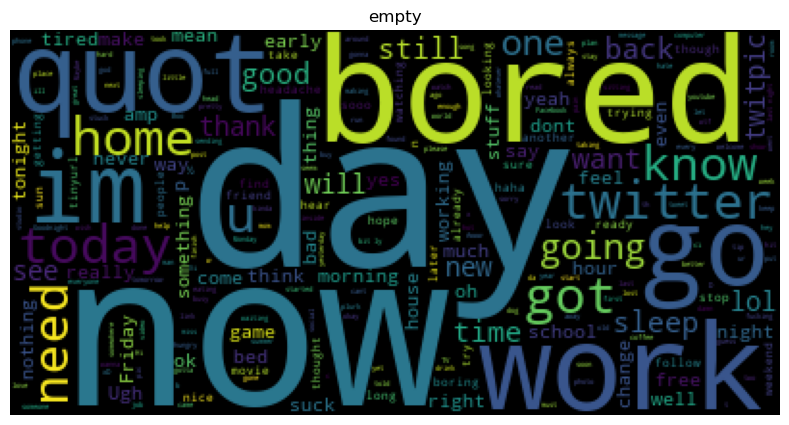

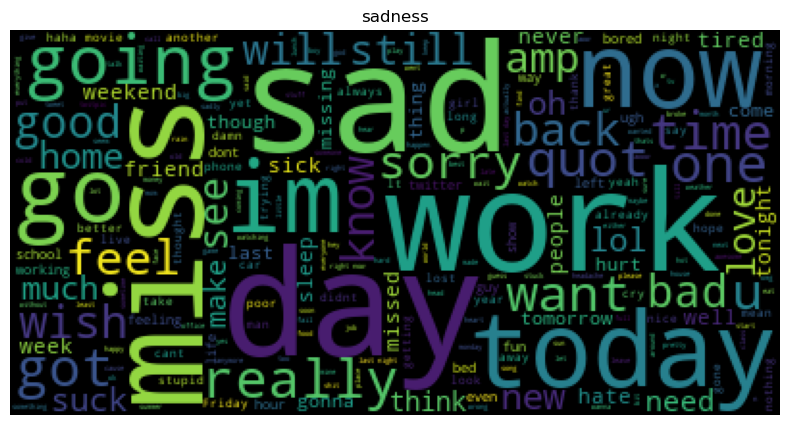

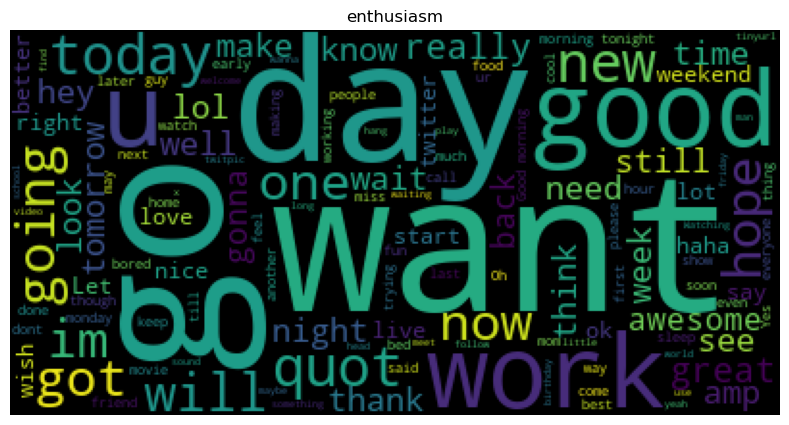

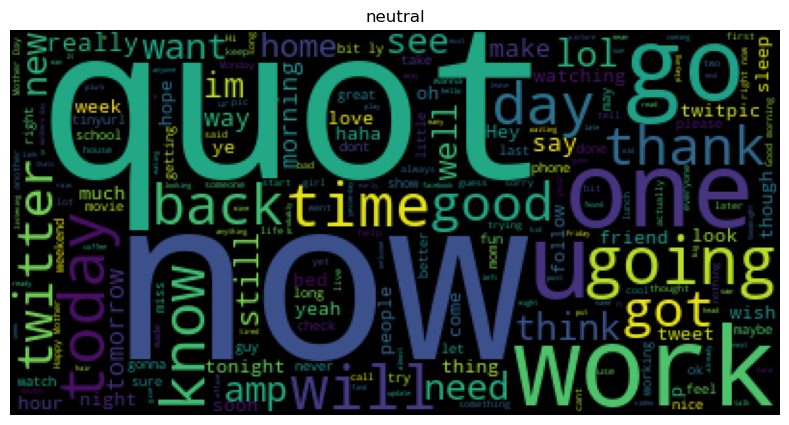

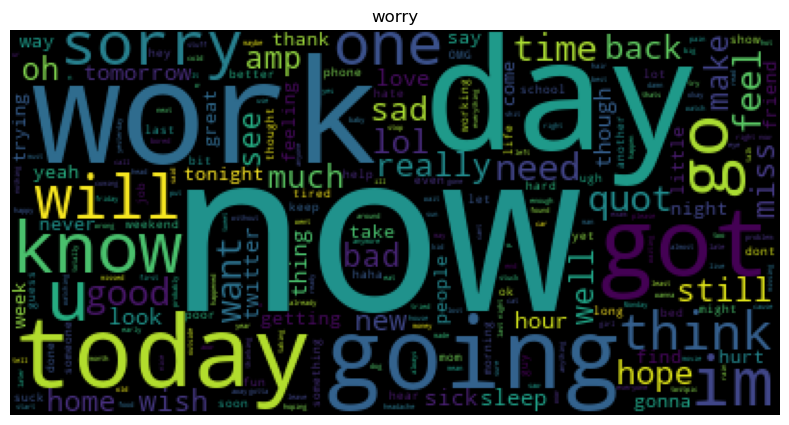

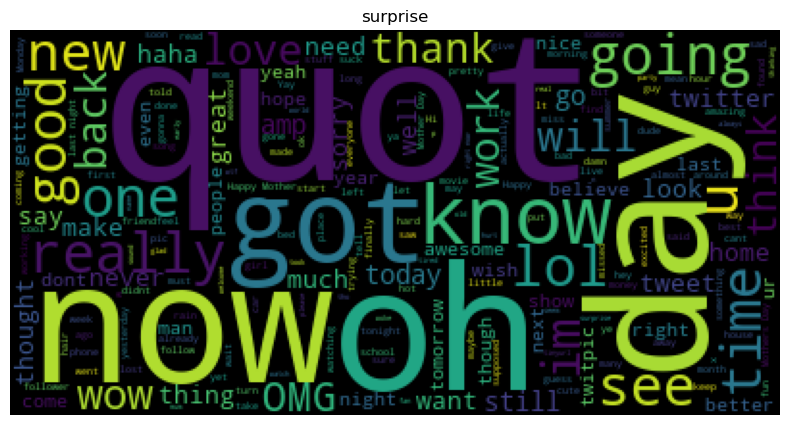

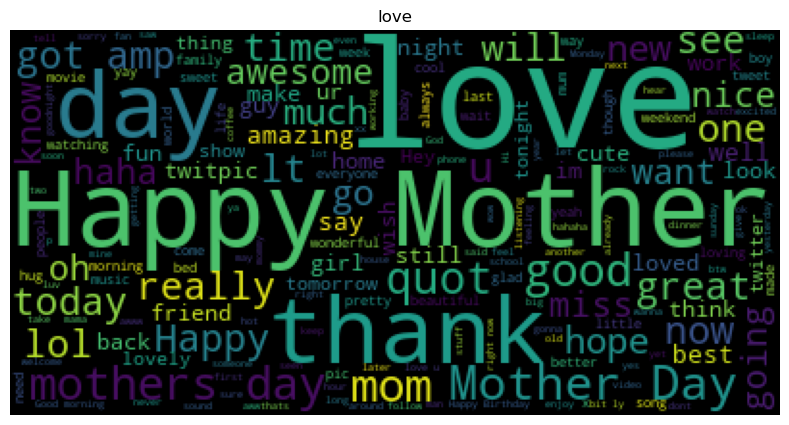

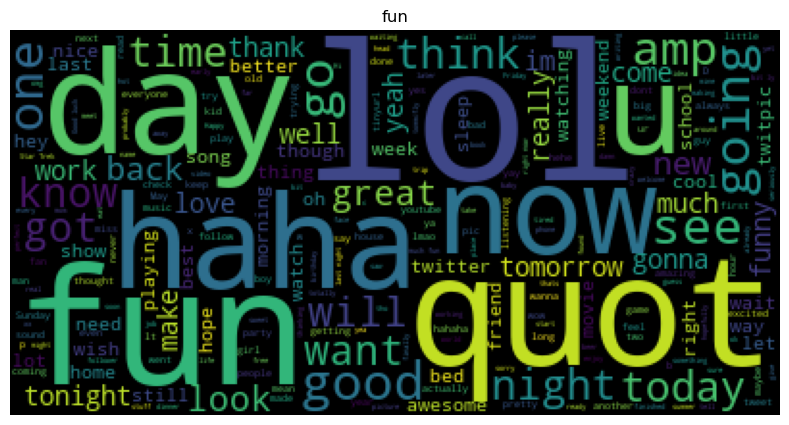

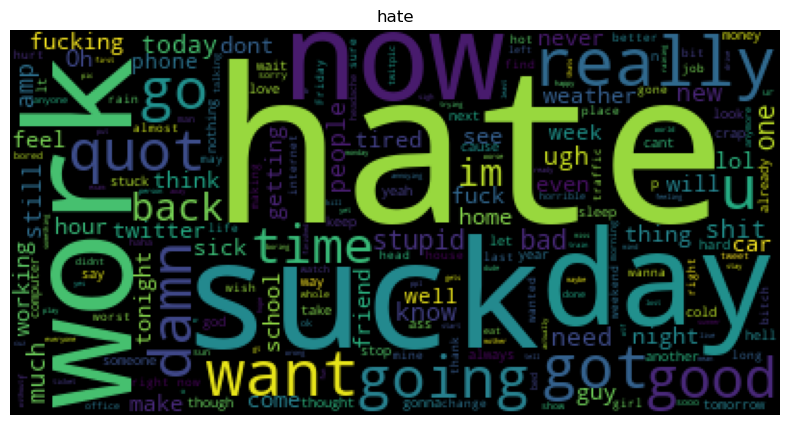

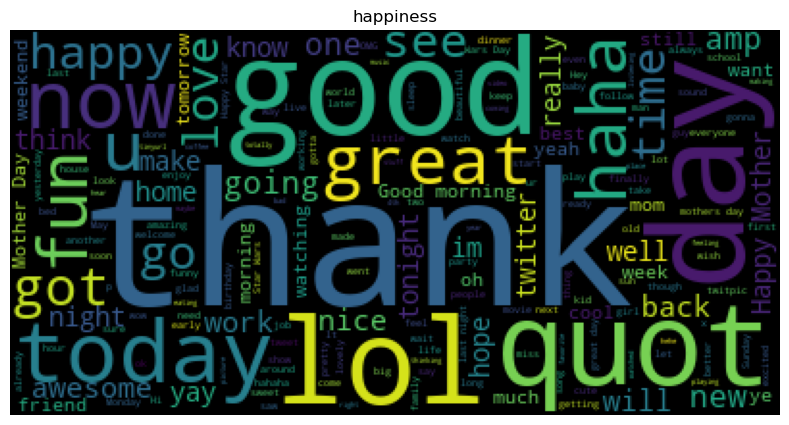

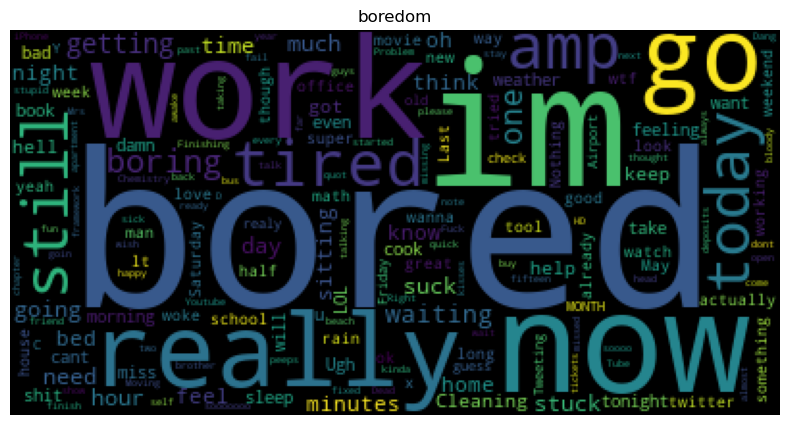

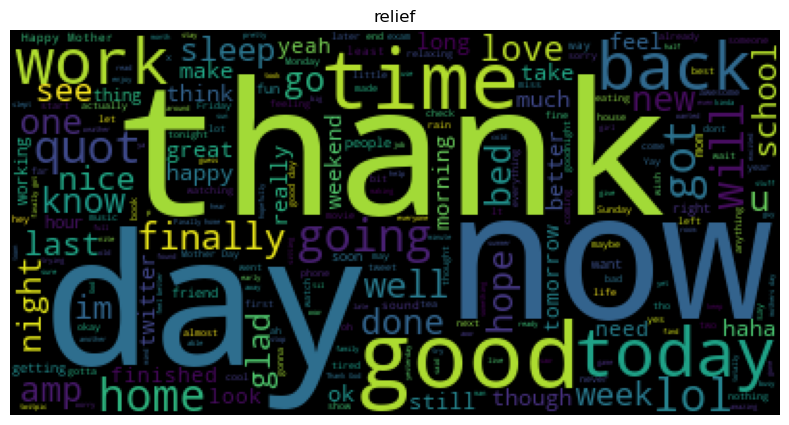

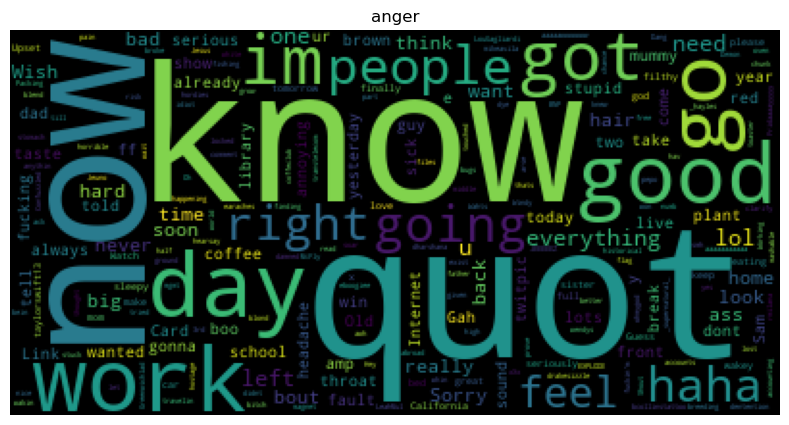

In [66]:
for emotion in df['sentiment'].unique():
    df_emotion = df[df['sentiment'] == emotion]
    emotion_all = ' '.join(df_emotion['content'])
    wordcloud=WordCloud(max_words=500).generate(emotion_all)
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(emotion)